In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("police.csv")

In [3]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


In [4]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
df["Year"] = df["Date"].dt.year

In [6]:
filtered_df = df[(df["Year"] >= 2007) & (df["Year"] <= 2017)]

In [7]:
filtered_df.sort_values("Year", inplace = True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
filtered_df.rename(columns={"Category": "Incidents", "PdDistrict": "Neighborhood"}, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [9]:
col = ["Incidents", "Neighborhood", "Year"]
filtered_df = filtered_df[col]

In [10]:
neighborhoods = ["BAYVIEW", "MISSION", "NORTHERN"]
filtered = filtered_df[filtered_df["Neighborhood"].isin(neighborhoods)]

In [11]:
filtered.head()

,Incidents,Neighborhood,Year
716206,ARSON,BAYVIEW,2007
716169,BURGLARY,MISSION,2007
1103638,LARCENY/THEFT,NORTHERN,2007
1758881,NON-CRIMINAL,NORTHERN,2007
716136,"SEX OFFENSES, FORCIBLE",MISSION,2007


In [12]:
final = filtered.groupby(['Neighborhood', 'Year'], as_index = False).count()

In [13]:
omega = final.pivot(index = 'Year', columns = 'Neighborhood', values = 'Incidents')

In [14]:
omega

Neighborhood,BAYVIEW,MISSION,NORTHERN
Year,,,
2007,13925,18434,16430
2008,14104,19721,16080
2009,13617,19117,15838
2010,14076,18119,14263
2011,13914,18237,14655
2012,14498,18786,16341
2013,14788,21156,18112
2014,13884,19438,18411
2015,14710,18537,20089


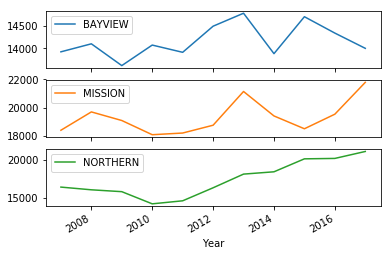

In [15]:
omega.plot(subplots=True)
plt.savefig('subplots.png')

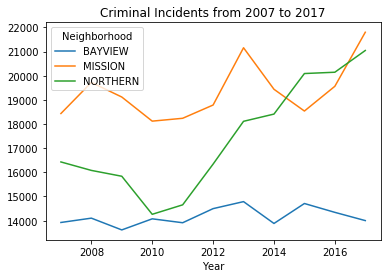

In [16]:
omega.plot().set_title('Criminal Incidents from 2007 to 2017')
plt.savefig('combined.png')

In [17]:
omega.to_csv('report.csv')